In [ ]:
!pip install fancyimpute
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from fancyimpute import KNN

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/homeworks/train.csv')
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df = data.copy(deep=True)

In [ ]:
# все строки
df = df.dropna(how='any')

Удалим категориальные и ненужные для предсказания переменные

In [ ]:
columnsToDrop = ['Name', 'Ticket', 'Cabin', 'Sex', 'Embarked', 'PassengerId']
df.drop(df[columnsToDrop], axis=1, inplace=True)

**Обучим модель**

In [ ]:
# Определяем Х и У
X = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

In [ ]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
model.predict(X_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model.score(X_train, y_train)

0.7191780821917808

Сравним результат с моделью, обученной на обработанных данных

In [ ]:
# удаляем ненужные для предсказания переменные
columnsToDrop = ['Name', 'Ticket', 'Cabin']
data.drop(data[columnsToDrop], axis=1, inplace=True)
print(data)

     PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female   NaN      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

    Embarked  
0          S  
1          C  
2          S  
3          S  
4          S  
..       

**4. Имя, номер билета и номер кабины - индивидуальные признаки, они не повлияют на обучение, однако их преобразование сделает количество признаков необоснованно большим.**

**8. Рассмотрим несколько переменных и найдем закономерности**

In [ ]:
data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Выживаемость первого класса выше

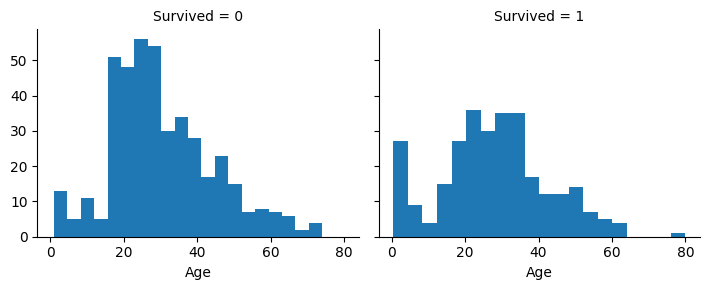

In [ ]:
g = sns.FacetGrid(data, col='Survived', aspect=1.2)
g.map(plt.hist, 'Age', bins=20)

Больше всего погибших - люди от 16 до 32 лет

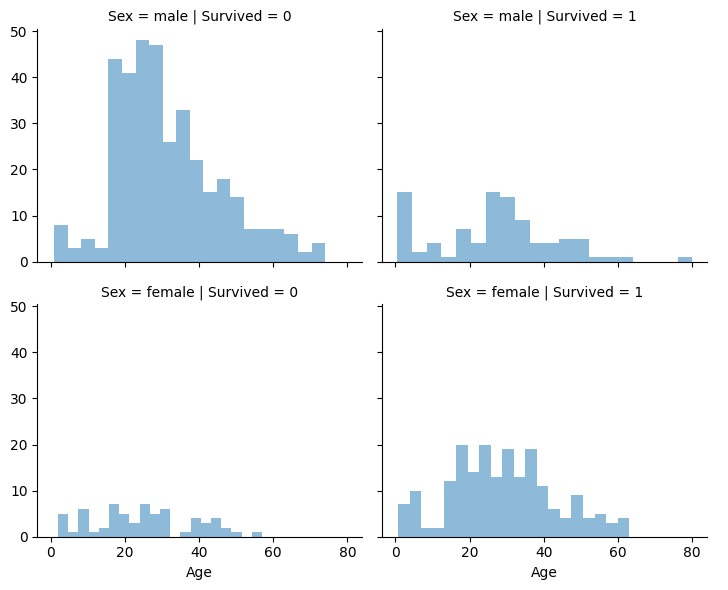

In [ ]:
grid = sns.FacetGrid(data, col='Survived', row='Sex', aspect=1.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Выживаемость среди женщин выше

Рассмотрим пропущенные значения и попробуем их обработать

In [ ]:
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Fare            0.000000
Embarked        0.224467
dtype: float64

**5. Процент пропущенных значений Age  - 20%, Embarked - 0.2%**

<Axes: >

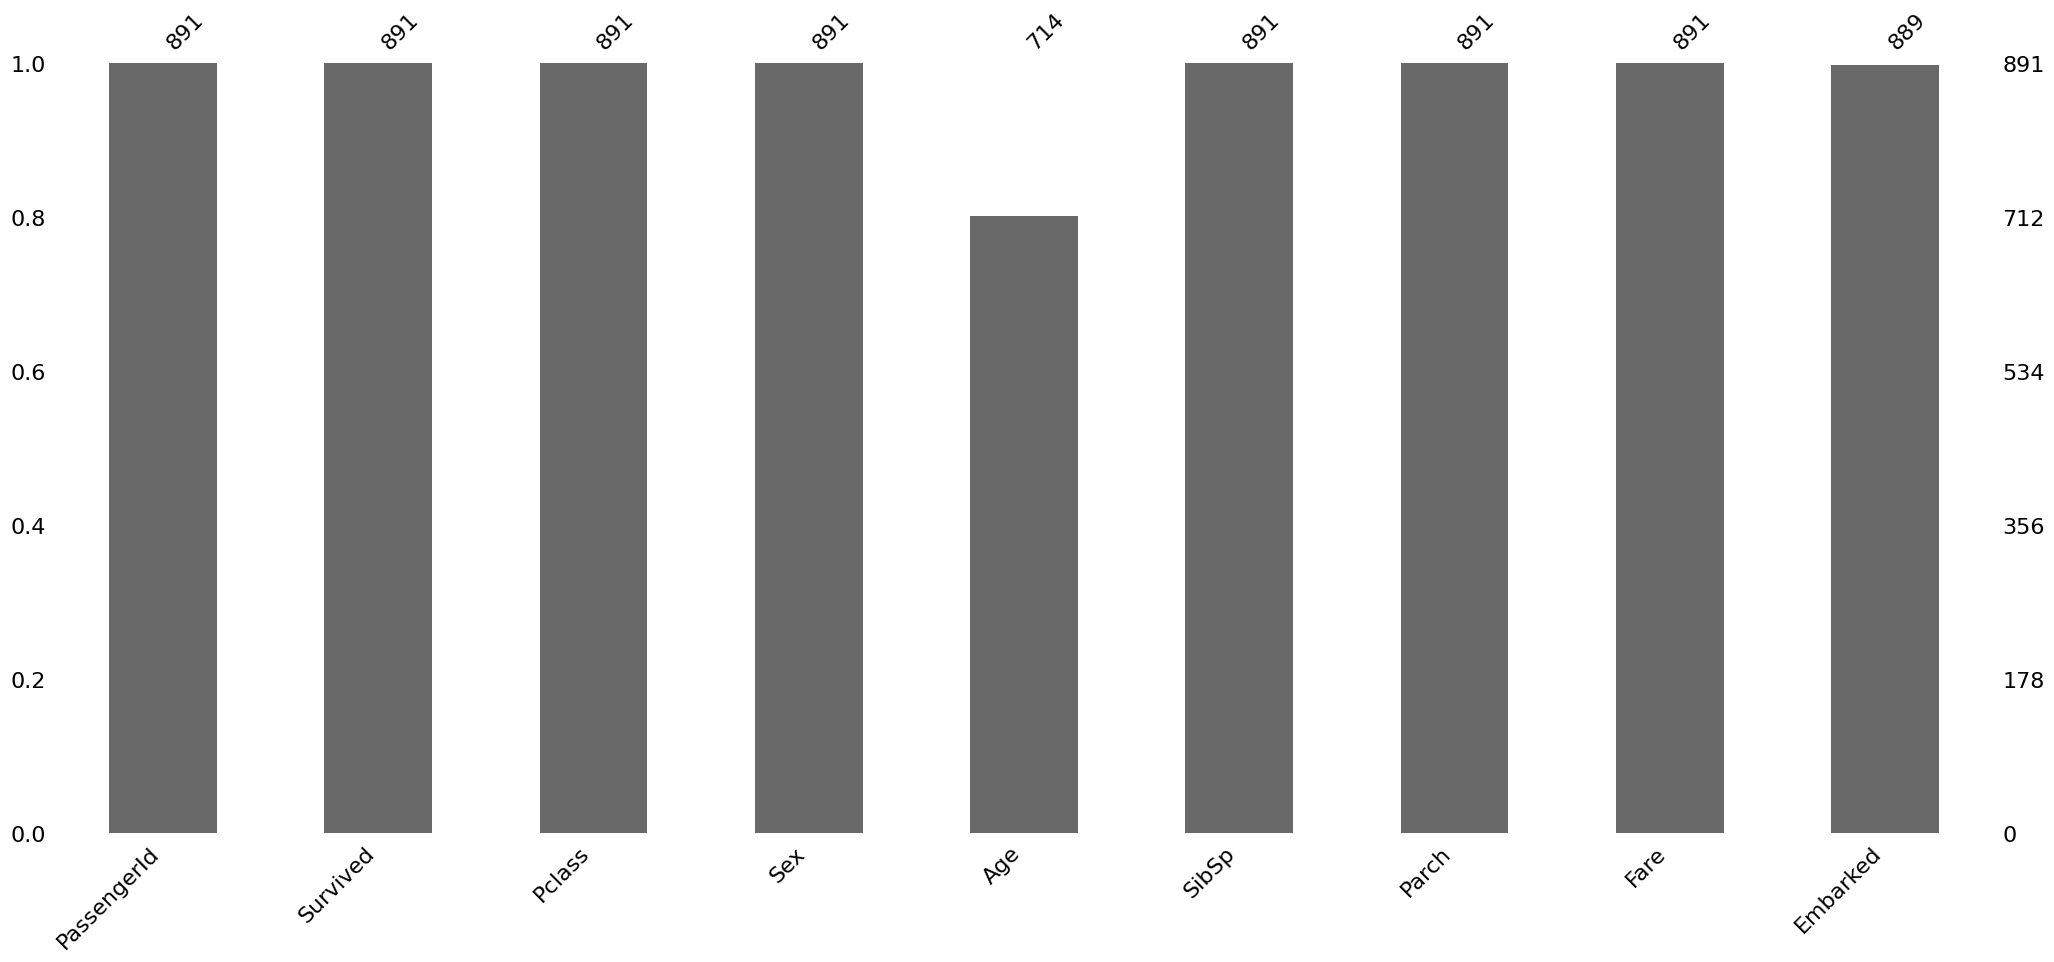

In [ ]:
msno.bar(data)

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

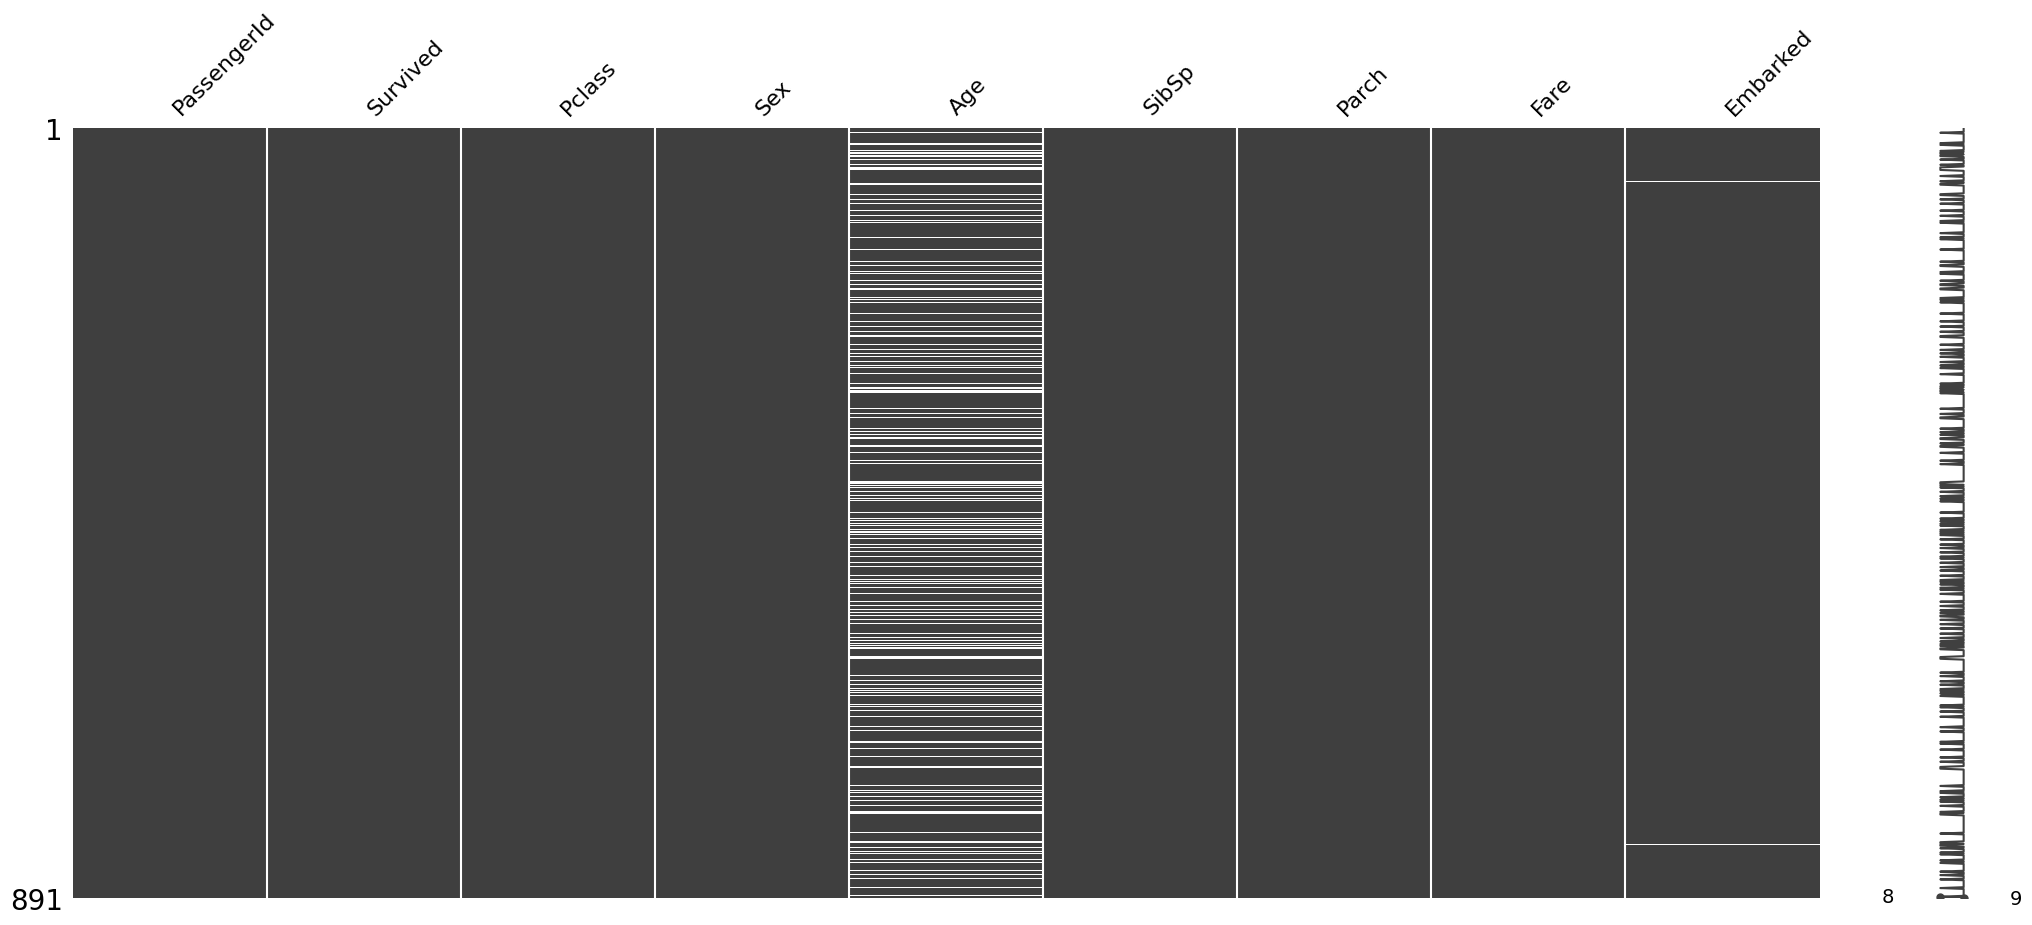

In [ ]:
msno.matrix(data)

<Axes: >

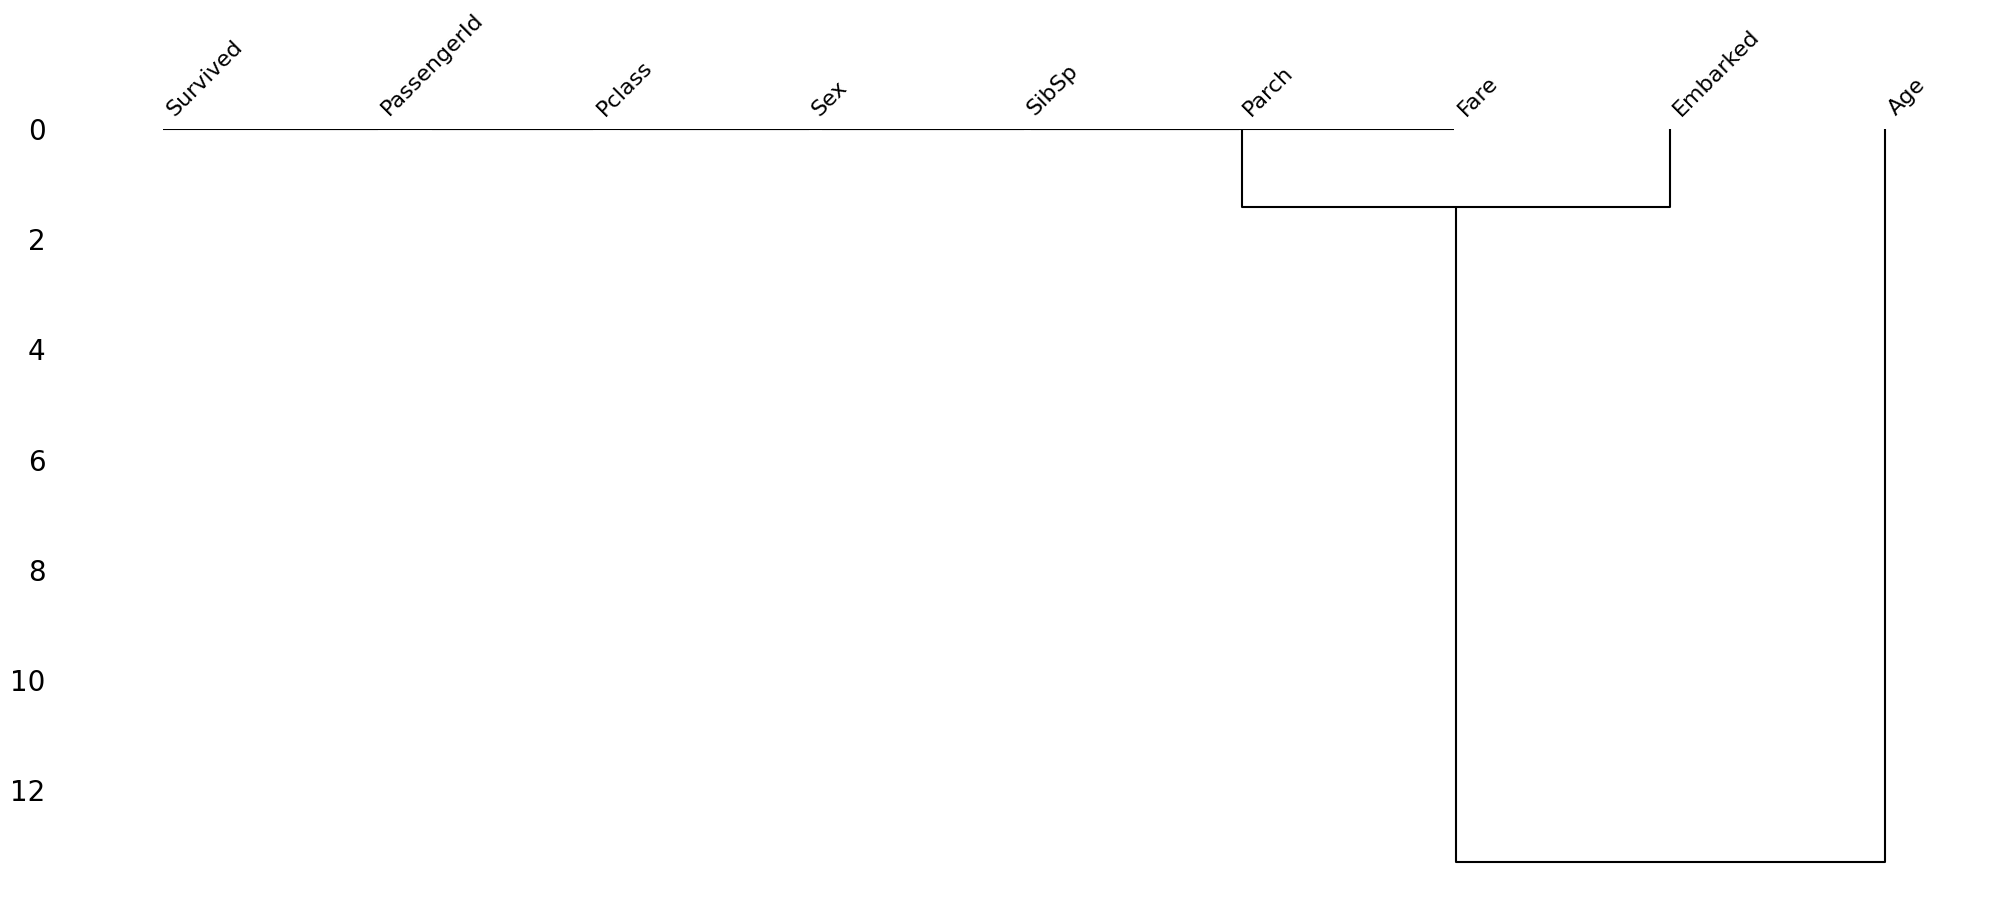

In [ ]:
msno.dendrogram(data)

Можно сделать вывод, что данные пропущены случайным образом, возраст коррелирует с наличием родителей на борту, ценой за билет и портом посадки, но мы не сможем предсказать по этим данным возраст пасажиров точнее, чем это сделал бы математический алгоритм, поэтому для целей этого исследования будем заполнять пропуски методом k-ближайших соседей (KNN не используется, когда данных пропущенно слишком много, у нас же это 20 и 0.2 процентов соответственно):

In [ ]:
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [ ]:
data_knn = data.copy(deep=True)
knn_imputer = KNN()
data_knn = knn_imputer.fit_transform(data)

data = pd.DataFrame(data_knn, columns=data.columns)

Imputing row 1/891 with 0 missing, elapsed time: 0.120
Imputing row 101/891 with 0 missing, elapsed time: 0.122
Imputing row 201/891 with 0 missing, elapsed time: 0.123
Imputing row 301/891 with 1 missing, elapsed time: 0.125
Imputing row 401/891 with 0 missing, elapsed time: 0.126
Imputing row 501/891 with 0 missing, elapsed time: 0.127
Imputing row 601/891 with 0 missing, elapsed time: 0.129
Imputing row 701/891 with 0 missing, elapsed time: 0.130
Imputing row 801/891 with 0 missing, elapsed time: 0.131


In [ ]:
data.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,0.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,0.0,0.0,1.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,0.0,0.0,1.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    float64
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    float64
 5   Parch        891 non-null    float64
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    float64
 8   Embarked_Q   891 non-null    float64
 9   Embarked_S   891 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB


**7. Логистическая регрессия, которую мы строим, чувствительна к выбросам, поэтому будем их удалять. Удалять будем выбросы в столбце возраст с помощью межквартильного диапазона.**

In [ ]:
print("Shape Before Removing Outliers:", data.shape)
Q1 = data.Age.quantile(0.25)
Q3 = data.Age.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
data2 = data
data2 = data[(data['Age']<upper_limit) & (data['Age']>lower_limit)]
print("Shape After Removing Outliers:", data2.shape)

Shape Before Removing Outliers: (891, 10)
Shape After Removing Outliers: (869, 10)


**Машинное обучение**

In [ ]:
data = data2

In [ ]:
X = data.drop("Survived", axis=1)
y = data["Survived"]

In [ ]:
model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [ ]:
model.predict(X_test)

array([0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 1., 0.])

In [ ]:
model.score(X_train, y_train)

0.8057553956834532

**Выводы по проделанной работе:**

a) Данные были исследованы, были найдены основные закономерности выживаемости пассажиров на борту, были изучены причины пропусков и пропуски были заполнены наиболее подходящим методом, были удалены выбросы, а также признаки, которые не помогли бы предсказанию, а лишь утяжеляли его, категориальные значения были переведены в численные.

b) Обработка данных позволила повысить метрику accuracy на 0.10

c) Работа с данными необходима даже для действительно больших данных, поскольку грамотное исследование может повысить точность модели больше, чем правильно подобранные гиперпараметры. В исследование гиперпараметры не подбирались, тем не менее, удалось повысить качество только обработкой исходных данных.

**Результат: применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных**